In [1]:
import os
import math
import json
import codecs
import numpy as np
from numpy import log, exp
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr, gaussian_kde

load the data

In [2]:
flankToCbf1Ddg = {}
flankToPho4Ddg = {}
firstLine = True
allFlanks = []
with open("../data/experimental/all_predicted_ddGs.csv") as inp:
    for line in inp:
        if firstLine:
            firstLine = False
            continue
        flank, Cbf1_ddg, Pho4_ddg = line.strip().split(',')
        flankToCbf1Ddg[flank] = float(Cbf1_ddg)
        flankToPho4Ddg[flank] = float(Pho4_ddg)
        allFlanks.append(flank)

In [3]:
obj_text1 = codecs.open("../data/preds/pbexo.pho4.flankToDeltaLogCount.json", 'r', encoding='utf-8').read()
flankToPho4PBexo = json.loads(obj_text1)

In [4]:
obj_text2 = codecs.open("../data/preds/pho4_120min_nexus_1.json", 'r', encoding='utf-8').read()
flankToPho4Nexus = json.loads(obj_text2)

In [5]:
obj_text3 = codecs.open("../data/preds/pbexo.cbf1.flankToDeltaLogCount.json", 'r', encoding='utf-8').read()
flankToCbf1PBexo = json.loads(obj_text3)

In [6]:
obj_text4 = codecs.open("../data/preds/chipexo.cbf1.flankToDeltaLogCount.json", 'r', encoding='utf-8').read()
flankToCbf1Exo = json.loads(obj_text4)

In [7]:
obj_text5 = codecs.open("../data/preds/limited.cbf1.eth.logCounts_fixed_min.json", 'r', encoding='utf-8').read()
flankToCbf1Eth = json.loads(obj_text5)

In [8]:
sampled_keys = np.random.choice(allFlanks, 100000, replace=False)

In [15]:
sampleToPho4PBexo = {}
sampleToPho4Nexus = {}
sampleToCbf1PBexo = {}
sampleToCbf1Exo = {}
sampleToCbf1Eth = {}
for key in sampled_keys:
    y_0 = np.array(flankToPho4PBexo[key][0]).astype(float)
    y_1 = np.array(flankToPho4PBexo[key][1]).astype(float)
    sampleToPho4PBexo[key] = np.mean(y_1-y_0)
    y_0 = np.array(flankToPho4Nexus[key][0]).astype(float)
    y_1 = np.array(flankToPho4Nexus[key][1]).astype(float)
    sampleToPho4Nexus[key] = np.mean(y_1-y_0)
    y_0 = np.array(flankToCbf1PBexo[key][0]).astype(float)
    y_1 = np.array(flankToCbf1PBexo[key][1]).astype(float)
    sampleToCbf1PBexo[key] = np.mean(y_1-y_0)
    y_0 = np.array(flankToCbf1Exo[key][0]).astype(float)
    y_1 = np.array(flankToCbf1Exo[key][1]).astype(float)
    sampleToCbf1Exo[key] = np.mean(y_1-y_0)
    y_0 = np.array(flankToCbf1Eth[key]).astype(float)
    sampleToCbf1Eth[key] = np.mean(y_0)

plotting code

In [16]:
%matplotlib inline

def plotCorrs(xdict, ydict, xlabel, ylabel):

    xvals = []
    yvals = []
    for key in xdict:
        xvals.append(xdict[key])
        yvals.append(ydict[key])

    xy = np.vstack([xvals,yvals])
    z = gaussian_kde(xy)(xy)
    smallFont = {'size' : 10}
    plt.rc('font', **smallFont)
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.1)
    axes = plt.gca()
    p, residuals, _, _, _ = np.polyfit(xvals, yvals, 1, full=True)
    m, b = p
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("spearman: "+str(spearmanr(xvals, yvals))+
              ", pearson: "+str(pearsonr(xvals, yvals))+
              ", residuals: "+str(residuals))
    plt.show()

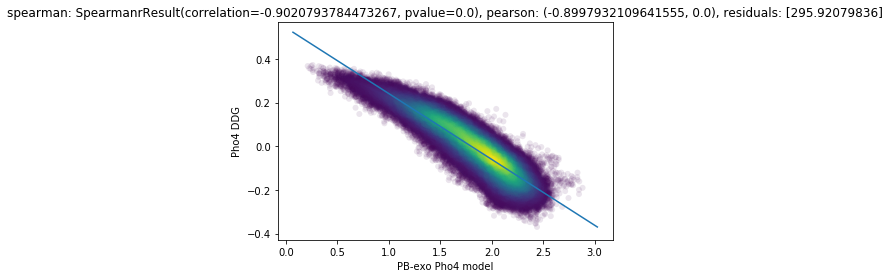

In [17]:
plotCorrs(sampleToPho4PBexo, flankToPho4Ddg, "PB-exo Pho4 model", "Pho4 DDG")

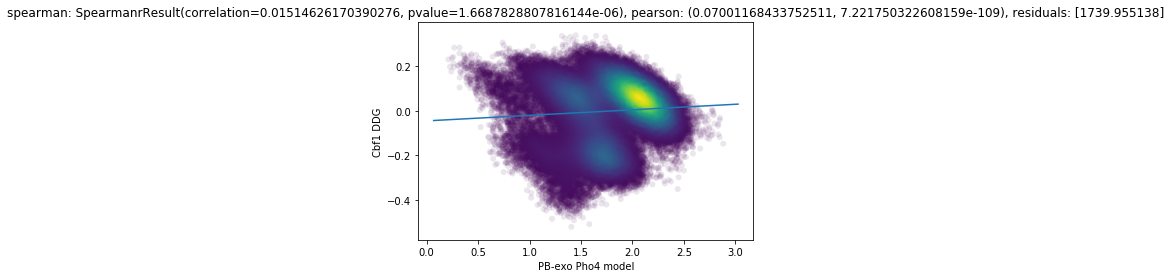

In [18]:
plotCorrs(sampleToPho4PBexo, flankToCbf1Ddg, "PB-exo Pho4 model", "Cbf1 DDG")

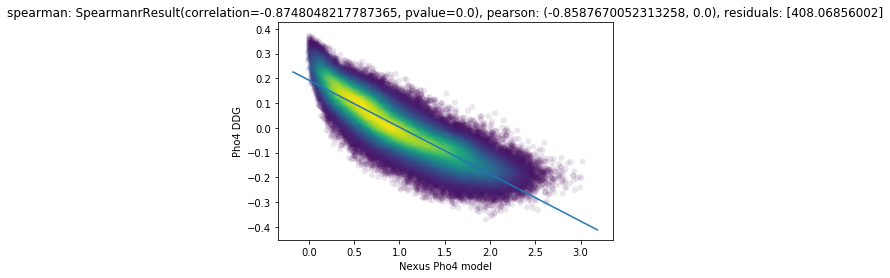

In [19]:
plotCorrs(sampleToPho4Nexus, flankToPho4Ddg, "Nexus Pho4 model", "Pho4 DDG")

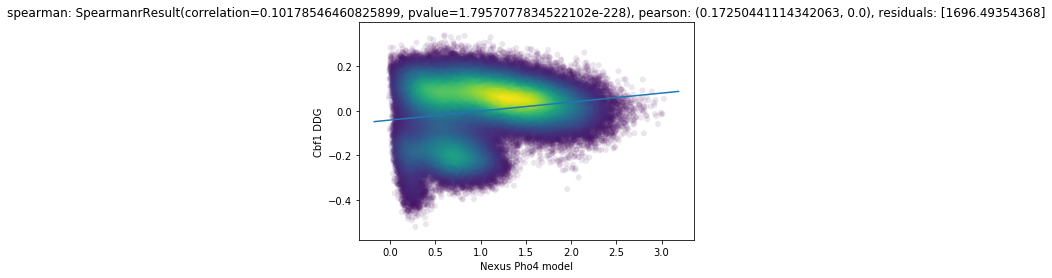

In [20]:
plotCorrs(sampleToPho4Nexus, flankToCbf1Ddg, "Nexus Pho4 model", "Cbf1 DDG")

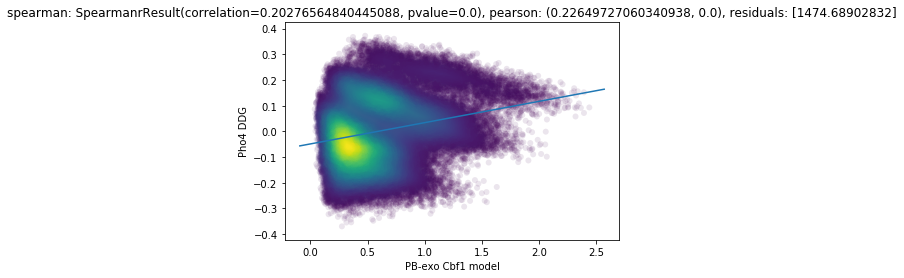

In [21]:
plotCorrs(sampleToCbf1PBexo, flankToPho4Ddg, "PB-exo Cbf1 model", "Pho4 DDG")

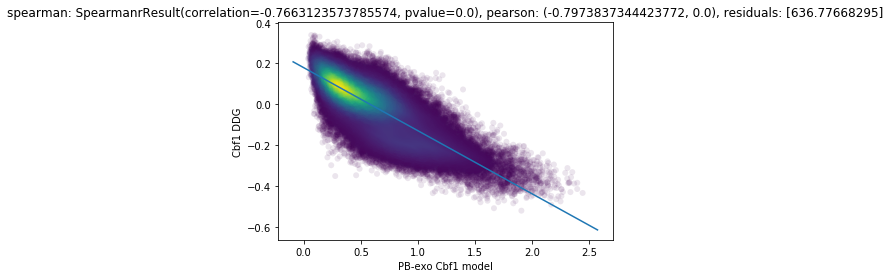

In [22]:
plotCorrs(sampleToCbf1PBexo, flankToCbf1Ddg, "PB-exo Cbf1 model", "Cbf1 DDG")

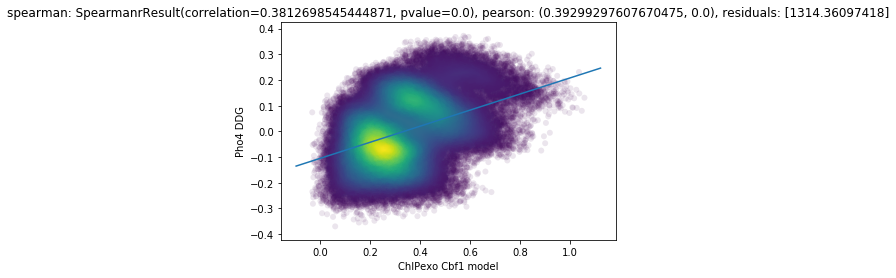

In [23]:
plotCorrs(sampleToCbf1Exo, flankToPho4Ddg, "ChIPexo Cbf1 model", "Pho4 DDG")

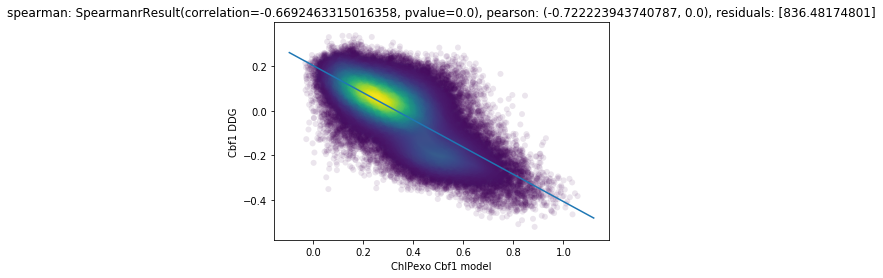

In [24]:
plotCorrs(sampleToCbf1Exo, flankToCbf1Ddg, "ChIPexo Cbf1 model", "Cbf1 DDG")

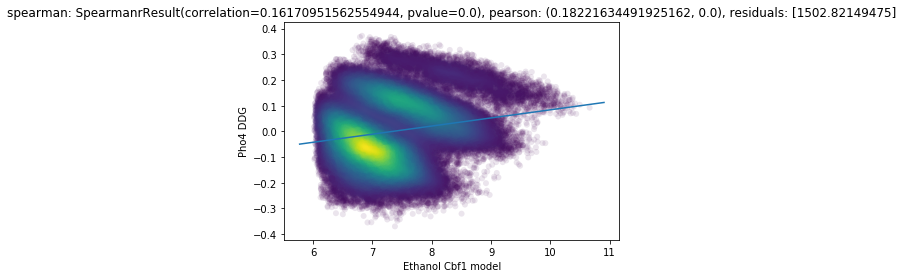

In [25]:
plotCorrs(sampleToCbf1Eth, flankToPho4Ddg, "Ethanol Cbf1 model", "Pho4 DDG")

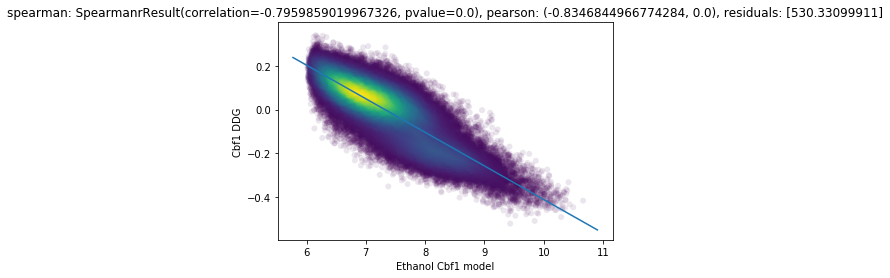

In [26]:
plotCorrs(sampleToCbf1Eth, flankToCbf1Ddg, "Ethanol Cbf1 model", "Cbf1 DDG")